Temperature:  1


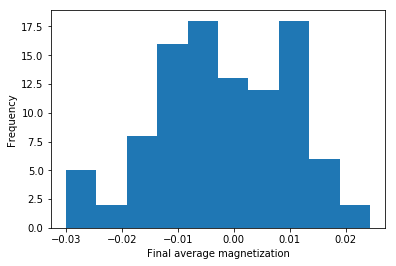

Temperature:  2


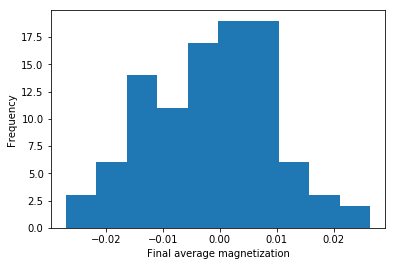

Temperature:  3


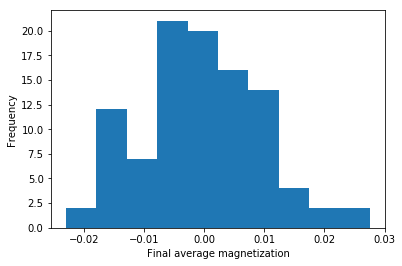

Temperature:  4


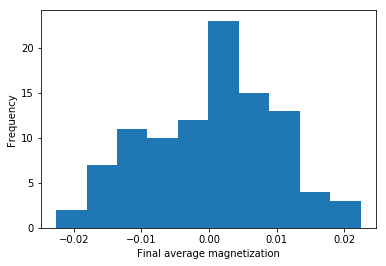

In [2]:
import matplotlib
import math
# matplotlib.use('TkAgg')
from pylab import *

n = 100 # size of space: n x n

def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < 0.5 else -1
    nextconfig = config
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
    
def update(T):
    global config, nextconfig
    x = randint(0,n-1)
    y = randint(0,n-1)
    E = -config[x, y]*(config[x, (y+1)%n]+config[x, (y-1)%n]+config[(x+1)%n, y]+config[(x-1)%n, y])
    if random() < min(1, math.exp(2*E/T)):
        nextconfig[x, y] = -config[x, y]
    nextconfig, config = config, nextconfig
    return sum(config)/(n*n)
# import pycxsimulator
# pycxsimulator.GUI().start(func=[initialize, observe, update])

def magnetization(T):
    magnet = []
    for i in range(100):
        initialize()
        mag = 0
        for j in range(1000):
            mag = update(T)
        magnet.append(mag)
#     return magnet
    matplotlib.pyplot.hist(magnet)
    matplotlib.pyplot.xlabel("Final average magnetization")
    matplotlib.pyplot.ylabel("Frequency")
    matplotlib.pyplot.show()
for i in range(1,5):
    print("Temperature: ", i)
    magnetization(i)